In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
temp_data = calc_temps("2016-08-01", "2016-08-08")

In [32]:
print(temp_data)

[(72.0, 78.03921568627452, 83.0)]


In [33]:
temp_data[0][1]

78.03921568627452

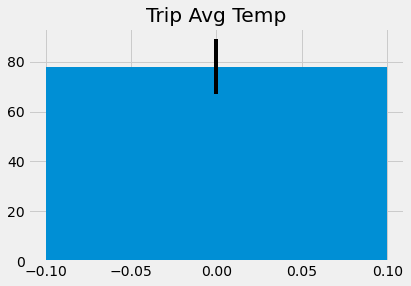

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.bar(0,height=temp_data[0][1], yerr=(temp_data[0][2] - temp_data[0][0]), align="center", width=0.2)
plt.title("Trip Avg Temp")
plt.show()

### Daily Rainfall Average

In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(Station.station, Station.latitude, Station.longitude, Station.elevation, func.count(Measurement.prcp), Measurement.date, Measurement.station).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()



[('USC00519281',
  21.45167,
  -157.84888999999998,
  32.9,
  2772,
  '2010-01-01',
  'USC00519281'),
 ('USC00513117', 21.4234, -157.8015, 14.6, 2696, '2010-01-01', 'USC00513117'),
 ('USC00519397', 21.2716, -157.8168, 3.0, 2685, '2010-01-01', 'USC00519397'),
 ('USC00519523',
  21.33556,
  -157.71139,
  19.5,
  2572,
  '2010-01-01',
  'USC00519523'),
 ('USC00516128', 21.3331, -157.8025, 152.4, 2484, '2010-01-01', 'USC00516128'),
 ('USC00514830', 21.5213, -157.8374, 7.0, 1937, '2010-03-01', 'USC00514830'),
 ('USC00511918', 21.3152, -157.9992, 0.9, 1932, '2010-01-01', 'USC00511918'),
 ('USC00517948', 21.3934, -157.9751, 11.9, 683, '2010-05-03', 'USC00517948'),
 ('USC00518838', 21.4992, -158.0111, 306.6, 342, '2010-01-01', 'USC00518838')]

In [ ]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session